**Họ và tên: Võ Hoàng Thông </br>
MSSV: 18521462 </br>
Lab 5**

**Câu 1. Tạo dataframe (df) lưu trữ dataset tại đường dẫn trên chọn cách đọc load từ internet. Xuất 10 samples bất kỳ. Dataset có bao nhiêu sample, số lượng bao nhiêu feature**

In [87]:
import pandas as pd
import io
from io import BytesIO
from urllib.request import Request, urlopen
link = 'https://raw.githubusercontent.com/datasethub/ds105/master/Lab_Model_Development.csv'
url = Request(link, headers={'User-Agent': 'Mozilla/5.0'})
df = pd.read_csv(BytesIO(urlopen(url).read()))
df.sample(10)

,curb-weight,engine-size,length,width,horsepower,city-mpg,highway-mpg,wheel-base,bore,price
179,2209,109,0.825084,0.909722,85.000000,27,34,97.3,3.19,7975.0
126,2579,132,0.872177,0.923611,104.256158,23,31,96.1,3.46,9295.0
16,3505,209,0.946660,0.984722,182.000000,15,20,110.0,3.62,36880.0
59,2410,122,0.854397,0.923611,84.000000,26,32,98.8,3.39,10245.0
44,4066,258,0.959154,0.966667,176.000000,15,19,113.0,3.63,32250.0
111,3485,152,0.955790,0.950000,95.000000,25,25,114.2,3.70,17075.0
15,3380,209,0.931283,0.943056,182.000000,16,22,103.5,3.62,41315.0
110,3285,120,0.955790,0.950000,95.000000,19,24,114.2,3.46,16695.0
84,2403,110,0.828448,0.908333,116.000000,23,30,96.3,3.17,9279.0
196,2952,141,0.907256,0.956944,114.000000,23,28,109.1,3.78,16845.0


**Số lượng sample và số lượng feature của dataset**

In [88]:
print("Sample dataset: ",df.shape[0])
print("Features dataset: ",df.shape[1])

Sample dataset:  201
Features dataset:  10


**Câu 2. Kiểm tra kiểu dữ liệu của các feature (curt-weight", "engine-size", "length', 'width', horsepower', city-mpg", "highway-mpg', 'wheel-base', 'bore') trong dataset có bị khuyết giá trị nào không?**

In [89]:
if not(df.isnull().sum().any()):
    print("Không khuyết giá trị")
else:
    print("Khuyết giá trị")

Không khuyết giá trị


In [90]:
df.columns

Index(['curb-weight', 'engine-size', 'length', 'width', 'horsepower',
       'city-mpg', 'highway-mpg', 'wheel-base', 'bore', 'price'],
      dtype='object')

**Câu 3. Phát triển mô hình Poynomial Regression bậc 3 để dự đoán giá xe từ biến "highway-mpg (tên mô hình poly).**

In [91]:
models = []

In [92]:
X = df[['highway-mpg']]
y = df['price']
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

In [93]:
import numpy as np
poly = np.poly1d(np.polyfit(df['highway-mpg'], df['price'], 3))
print(poly)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


**Câu 4. Tính MSE và R^2 để đánh giá tập mẫu của mô hình poly bằng phương pháp thủ công. Phát họa distribution plot để đánh giá mô hình.**

In [94]:
lm = LinearRegression()
lm.fit(X_poly,y)
models.append([lm,X_poly,y])

In [95]:
def mean_squared_error(y_true, y_pred):
    residual = y_true - y_pred
    MSE = (1/len(y_true))*np.sum(residual**2)
    return MSE

In [96]:
def r2_score(y_true, y_pred):
    residual = y_true - y_pred
    SSR = np.sum(residual**2)
    SST = np.sum((y_true - np.mean(y_true)) ** 2)
    R2_score = 1 - SSR / SST
    return R2_score

In [97]:
residual = df['price'].values - poly(df['highway-mpg'])
MSE = (1/df.shape[0])*np.sum(residual**2)
print("MSE = ", MSE)

MSE =  20474146.426361218


In [98]:
SSR = np.sum(residual**2)
SST = np.sum((df['price'].values - np.mean(df['price'].values)) ** 2)
R2_score = 1 - SSR / SST 
print("R2 score = ", R2_score)

R2 score =  0.674194666390652


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


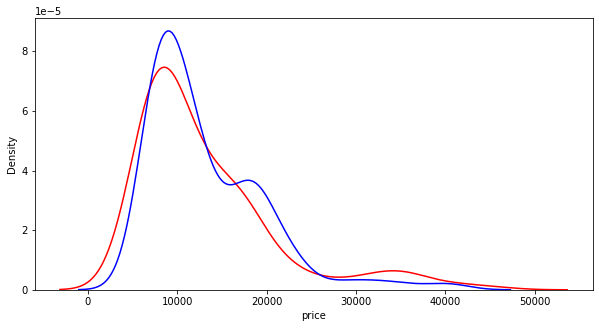

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 1, figsize = (10, 5))
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(poly(df['highway-mpg']), hist = False, color = 'b', label = 'Fitted Values', ax = ax1)
plt.show()

**Kết luận:** Mô hình khá phú hợp và tương đồng với dữ liệu thực tế 

**Câu 5. Phát triển mô hình hồi quy tuyến tính đa biến để dự đoán giá xe từ biến "horsepower', 'curbs-weight', 'engine-size' "highway-mpg'**

In [100]:
from sklearn.linear_model import LinearRegression
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
reg = LinearRegression().fit(X, df['price'])
print(reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [101]:
lm = LinearRegression()
lm.fit(X,y)
models.append([lm,X,y])

**Câu 6. Tính MSE và R^2 để đánh giá tập mẫu của mô hình trên bằng phương pháp thủ công và gọi hàm. Phát họa distribution plot để đánh giá mô hình**

**Thủ công**

In [102]:
print("MSE = ", mean_squared_error(df['price'].values, reg.predict(X)))
print("R2 score = ",r2_score(df['price'].values, reg.predict(X)))

MSE =  11980366.87072649
R2 score =  0.8093562806577457


**Gọi hàm**

In [103]:
import sklearn.metrics as metrics
print("MSE = ", metrics.mean_squared_error(df['price'].values, reg.predict(X)))
print("R2 score = ", metrics.r2_score(df['price'].values, reg.predict(X)))

MSE =  11980366.87072649
R2 score =  0.8093562806577457


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


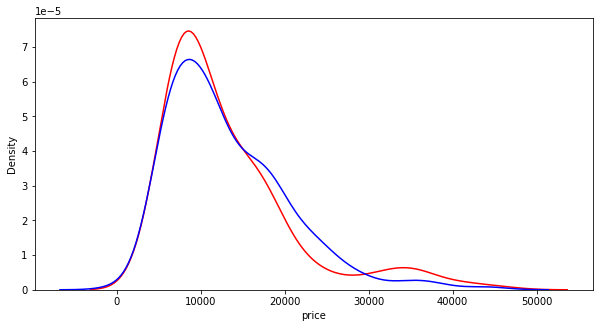

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 1, figsize = (10, 5))
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(reg.predict(X), hist = False, color = 'b', label = 'Fitted Values', ax = ax1)
plt.show()

**Câu 7. Phát triển mô hình Polynomial Resession bậc 2 để dự đoán giá xe từ biến 'horsepower', 'curb-weight'engine-size', 'highway-mpg**

In [105]:
from sklearn.preprocessing import PolynomialFeatures
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
degree = 2
pr = PolynomialFeatures(degree = degree, include_bias = False)
X_poly = pr.fit_transform(X)
poly_degree2 = LinearRegression().fit(X_poly, df['price'])

In [106]:
poly_degree2.intercept_

-21262.848277788085

In [107]:
poly_degree2.coef_

array([ 3.79990747e+02,  9.53081616e+00, -1.06265103e+02,  1.82168928e+02,
        1.69423474e+00, -1.86864385e-01, -1.29043091e+00, -2.14860064e+00,
        7.57100954e-04,  1.11910005e-01, -1.92007463e-01,  8.95252693e-02,
        4.23869258e-02,  4.66019878e+00])

**Câu 8. Tinh MSE và R2 để đánh giá tập mẫu của mô hình trên bằng phương pháp thủ công và gọi hàm Phát họa distribution plot để đánh giá mô hình.**

**Thủ công**

In [108]:
print("MSE = ", mean_squared_error(df['price'].values, poly_degree2.predict(X_poly)))
print("R2 score = ",r2_score(df['price'].values, poly_degree2.predict(X_poly)))

MSE =  9656613.4039896
R2 score =  0.8463341969864728


**Gọi hàm**

In [109]:
import sklearn.metrics as metrics
print("MSE = ", metrics.mean_squared_error(df['price'].values, poly_degree2.predict(X_poly)))
print("R2 score = ", metrics.r2_score(df['price'].values, poly_degree2.predict(X_poly)))

MSE =  9656613.4039896
R2 score =  0.8463341969864728


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


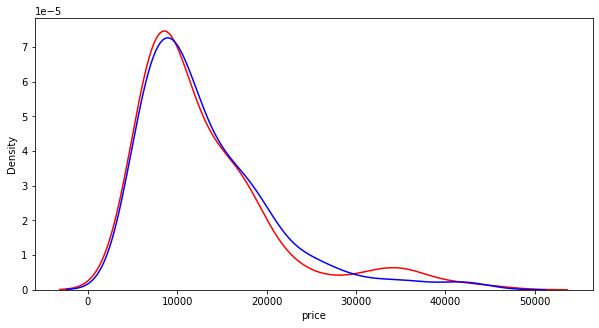

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 1, figsize = (10, 5))
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(poly_degree2.predict(X_poly), hist = False, color = 'b', label = 'Fitted Values', ax = ax1)
plt.show()

**Câu 9. Thiết kế một pipeline để phát triển mô hình nô hình Polynomial Regression bậc 2 để dự đoán giá xe từ biển horsepowe, curb weight, engine size, "highway-mpg. Trong pipeline thực hiện các công việc sau: Normalize,
Transform -> feature, LinearRegression để fit tìm mô hình. Xuất mô hình
vừa tìm được.**

In [111]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [112]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = df['price']

In [113]:
Input = [('scale', StandardScaler()), 
         ('polynomial', PolynomialFeatures(include_bias=False)),
         ('model', LinearRegression())]

In [114]:
pipe = Pipeline(Input)
pipe.fit(X, Y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [115]:
ypipe = pipe.predict(X)
pipe['model']

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
models.append([pipe,X,Y])

In [117]:
yhat = pipe.predict(X)

In [118]:
def f(coefficients, intercept):
  def term(coef, power):
    coef = coef if coef != 1 else ''
    power = (f'{power}')
    return f'{coef}x{power}'
  terms = []
  for power, coef in enumerate(coefficients, start=1):
    if coef != 0:
      terms.append(term(coef, power))
  return 'y = ' + str(intercept) + ' + ' + ' + '.join(terms)

In [119]:
print(f(pipe['model'].coef_, pipe['model'].intercept_))

y = 11649.375342855667 + 863.1134630852017x1 + 1230.3710256642391x2 + 2914.2854120669463x3 + -1626.9833804029868x4 + 2353.714349194228x5 + -3593.960683003887x6 + -1993.3325155154052x7 + -544.4251404267845x8 + 201.58916794774575x9 + 2393.208424999013x10 + -673.5458935195298x11 + 153.76427801168347x12 + 11.942058999508447x13 + 215.37198445678783x14


**Câu 10. Tìm khoảng giá trị được xem là vô lý trong các mô hình đã tìm thấy**

**Câu 11. Xếp hạng các mô hình đã phát triển ở các câu trên.**

In [120]:
scores = [[model[0]['model'],model[0].score(model[1],model[2])] if isinstance(model[0], Pipeline) else [model[0],model[0].score(model[1],model[2])] for model in models]

In [121]:
ranking = pd.DataFrame(scores,columns=['Model', 'R2 score'])
ranking['Ranking'] = ranking['R2 score'].rank(ascending=False)
ranking.sort_values(by='Ranking')

,Model,R2 score,Ranking
2,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.846334,1.0
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.809356,2.0
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.674195,3.0


**Câu 12. Phát triển 1 mô hình nào khác tốt hơn các mô hình tốt hơn các mô hình trên. Nếu có, chứng minh mô hình của bạn là tốt hơn.**


In [122]:
features = ['engine-size', 'curb-weight', 'horsepower', 'width']

In [123]:
X = df[features]
y = df['price']

In [124]:
pipe = Pipeline([('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())])

In [125]:
pipe.fit(X,y)
pipe.score(X,y)

0.8684292548507997

**Câu 13. Viết hàm trả về kết quả dự đoán từ một hoặc nhiều feature thuộc 'curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore'.**

In [126]:
features = ['curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore']

In [127]:
corrs = [[feature,df[[feature,'price']].corr().iloc[0,1],abs(df[[feature,'price']].corr().iloc[0,1])] for feature in features] 

In [128]:
corr_rank = pd.DataFrame(corrs, columns=['Feature','Correlation with \'price\'','Correlation strength']).sort_values(by='Correlation strength',ascending = False).iloc[:,:2]
corr_rank

,Feature,Correlation with 'price'
1,engine-size,0.872335
0,curb-weight,0.834415
4,horsepower,0.809575
3,width,0.751265
6,highway-mpg,-0.704692
2,length,0.690628
5,city-mpg,-0.686571
7,wheel-base,0.584642
8,bore,0.543155


In [129]:
features = corr_rank['Feature'].values

In [130]:
best_models = []
for i in range(len(features)):
  train_features = features[:i+1]
  X = df[train_features]
  y = df['price']
  pipe = Pipeline([('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())])
  pipe.fit(X,y)
  best_models.append(pipe)
  print('Model {}:'.format(i),train_features)
  print('r2_score:',pipe.score(X,y))

Model 0: ['engine-size']
r2_score: 0.7610415105095263
Model 1: ['engine-size' 'curb-weight']
r2_score: 0.7997727362365323
Model 2: ['engine-size' 'curb-weight' 'horsepower']
r2_score: 0.8395026206980695
Model 3: ['engine-size' 'curb-weight' 'horsepower' 'width']
r2_score: 0.8684292548507997
Model 4: ['engine-size' 'curb-weight' 'horsepower' 'width' 'highway-mpg']
r2_score: 0.8705940245114754
Model 5: ['engine-size' 'curb-weight' 'horsepower' 'width' 'highway-mpg' 'length']
r2_score: 0.8902491655672402
Model 6: ['engine-size' 'curb-weight' 'horsepower' 'width' 'highway-mpg' 'length'
 'city-mpg']
r2_score: 0.9318470083640792
Model 7: ['engine-size' 'curb-weight' 'horsepower' 'width' 'highway-mpg' 'length'
 'city-mpg' 'wheel-base']
r2_score: 0.9363293217809677
Model 8: ['engine-size' 'curb-weight' 'horsepower' 'width' 'highway-mpg' 'length'
 'city-mpg' 'wheel-base' 'bore']
r2_score: 0.9442981562836934


In [ ]:
prompt = '---> Chọn (vài) feature trong những feature sau và nhập dữ liệu cho feature đó: \n'
for i in range(len(features)):
    prompt += '{}: {}, '.format(i, features[i])
prompt += '\n---> Ví dụ nhập:\n5 0.8566 3 0.9201 2 129\nđể nhập dữ liệu cho 3 feature \'length\',\'width\',\'horsepower\'.\n'
inputs = input(prompt).split()
input_data = [] 
for i in range(len(inputs)//2):
    input_data.append([int(inputs[2*i]),float(inputs[2*i+1])])

In [131]:
def predict(X_data):
  lowest_corr_feature = max([input[0] for input in input_data])
  train_features = features[:lowest_corr_feature+1]
  print('Model đã được dùng là model polynomial gồm các biến:',train_features)
  default_sample = [df[feature].quantile(0.5) for feature in train_features]
  for data in X_data:
      default_sample[data[0]] = data[1]
  yhat = best_models[lowest_corr_feature].predict([default_sample])[0]
  return yhat

In [ ]:
predicted_value = predict(input_data)
print('---> Với sample vừa nhập, kết quả dự đoán \'price\' là {}'.format(predicted_value if predicted_value>=0 else 'một kết quả vô lý vì bạn vừa nhập dữ liệu sai.'))